Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advance Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<u>**ACTIVITY NO.** | **Performing Face Recognition**
**Name** | De los Reyes, Jann Moises Nyll
**Section** | CPE312S3
**Date Performed**: | February 21 2025
**Date Submitted**: | February 21 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

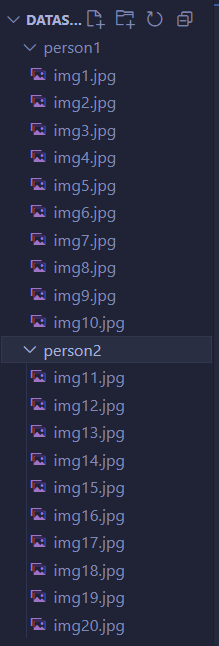

[Link to the dataset](https://drive.google.com/drive/folders/1cgxXKJhYxIyYYDyXOMdl4beHnL6P6MmK?usp=sharing)

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [45]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          if "person1" in subject_path:  # Only include images from person1 (Nyll)
                        X.append(np.asarray(im, dtype=np.uint8))
                        y.append(c)

          #X.append(np.asarray(im, dtype=np.uint8))
          #y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [46]:
read_images(r"C:\Users\Lenovo\Downloads\dataset")

[[array([[193, 192, 192, ..., 195, 195, 195],
         [192, 193, 194, ..., 196, 195, 194],
         [191, 193, 194, ..., 197, 196, 197],
         ...,
         [161, 164, 166, ..., 146, 144, 146],
         [159, 164, 166, ..., 147, 145, 149],
         [162, 164, 164, ..., 148, 145, 148]], dtype=uint8),
  array([[191, 192, 190, ..., 201, 202, 202],
         [194, 194, 193, ..., 203, 203, 201],
         [190, 190, 189, ..., 201, 201, 200],
         ...,
         [168, 169, 168, ..., 150, 149, 147],
         [167, 170, 171, ..., 151, 150, 148],
         [167, 167, 168, ..., 152, 151, 150]], dtype=uint8),
  array([[195, 192, 189, ..., 183, 183, 183],
         [197, 193, 190, ..., 184, 183, 184],
         [197, 194, 191, ..., 182, 186, 184],
         ...,
         [163, 162, 163, ..., 145, 146, 146],
         [162, 164, 165, ..., 145, 148, 145],
         [161, 162, 163, ..., 145, 147, 145]], dtype=uint8),
  array([[196, 196, 196, ..., 181, 183, 180],
         [198, 197, 197, ..., 182, 183,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

<font color = orange> The function above access our dataset and generate all sub folder images into a grayscale then it will resize the images and transform the values of pixel into a num array that will be use in later. Some challenges I encounter is the cropping of the image which may effect the detection later.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [6]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def face_rec():
    names = ['Nyll', 'Nicole'] # Put your names here for faces to recognize
    image_path = r"C:\Users\Lenovo\Downloads\dataset"
    [X, y] = read_images(image_path, (200, 200))

    if len(X) == 0 or len(y) == 0:
        print("No images found or unable to read images.")
        return

    y = np.asarray(y, dtype=np.int32)
    model = cv2.face.EigenFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]]
                cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

During the run of the program,  our face is detected and recognize both of our faces. The program also display the 
name and the accuracy of the model. Some challenges I encounter is that my `cv2` have no required module which  can be resolve by installing the `opencv-contrib-python`. I also always forget to restart my kernel and  other argument position such as `sys`. In the end, I managed to resolve all necessary things to run the script.


#### Sample Output
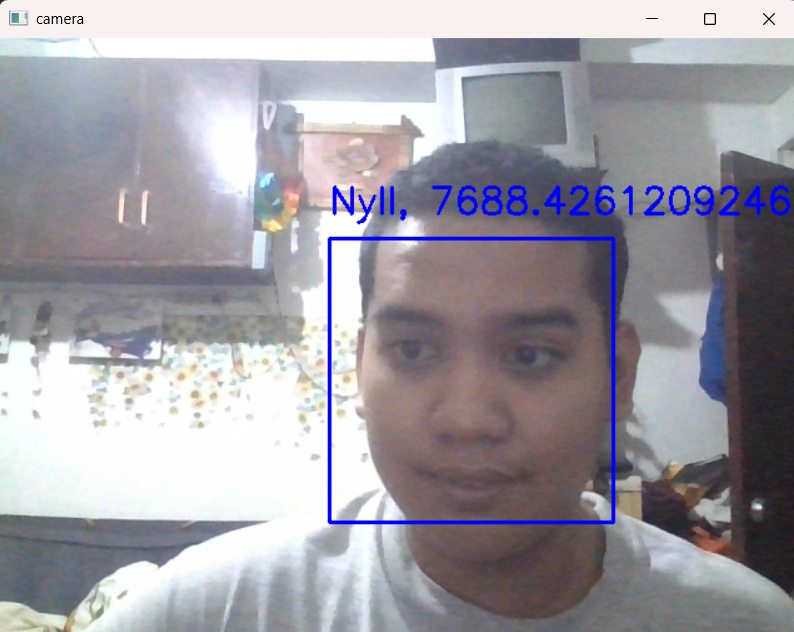

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

#### Sample Output (FischerFaceRecognizer)

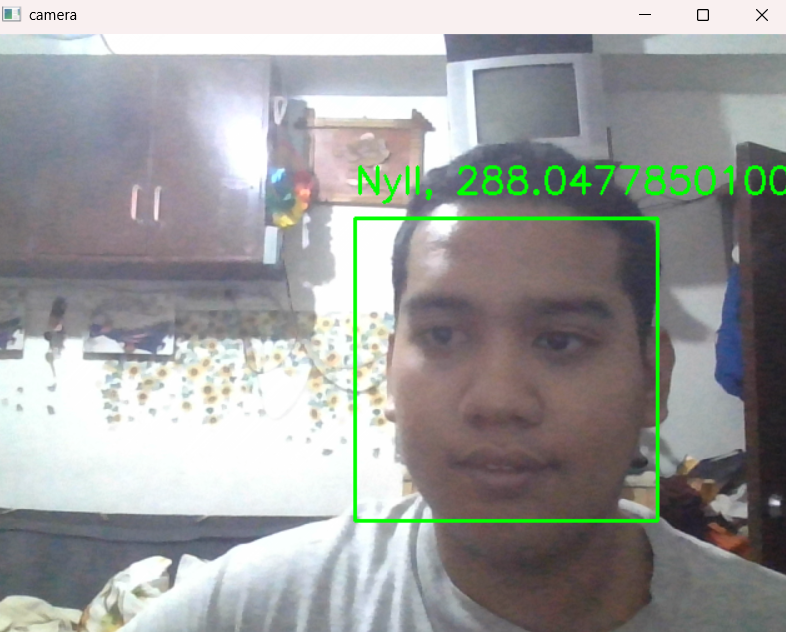

#### Sample Output ( Local Binary Pattern Histograms (LBPH))
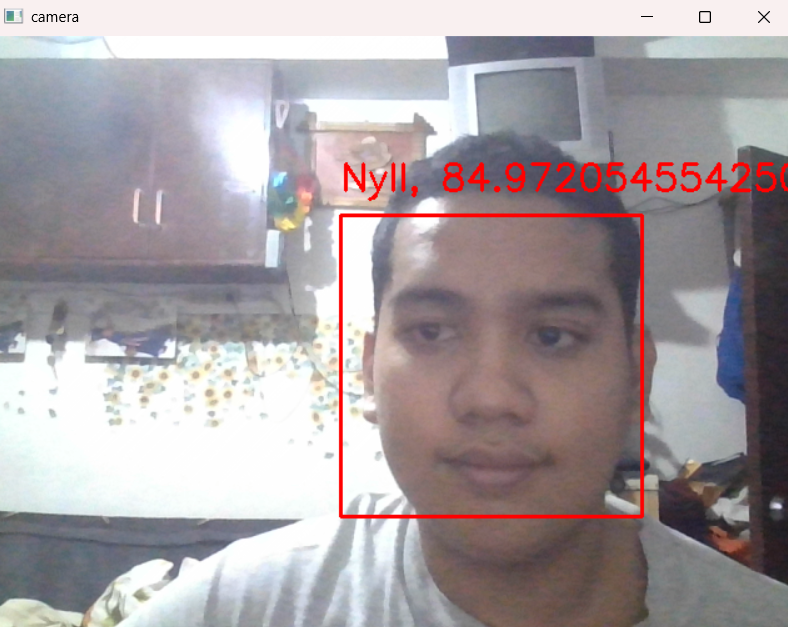

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

<font color = orange> This method forms the underlying principle of the face recognition model, outputting a tuple with two components: the Label (predicted class) and Confidence (distance). The Label corresponds to the identified person's name (e.g., person1, person2), making the results more readable. The Confidence indicates the reliability of the prediction, allowing for the adjustment of a threshold to enhance the model's recognition accuracy. This provides a means to fine-tune the model for better performance.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [74]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [75]:
read_images(r"C:\Users\Lenovo\Downloads\dataset")

[[array([[193, 192, 192, ..., 195, 195, 195],
         [192, 193, 194, ..., 196, 195, 194],
         [191, 193, 194, ..., 197, 196, 197],
         ...,
         [161, 164, 166, ..., 146, 144, 146],
         [159, 164, 166, ..., 147, 145, 149],
         [162, 164, 164, ..., 148, 145, 148]], dtype=uint8),
  array([[191, 192, 190, ..., 201, 202, 202],
         [194, 194, 193, ..., 203, 203, 201],
         [190, 190, 189, ..., 201, 201, 200],
         ...,
         [168, 169, 168, ..., 150, 149, 147],
         [167, 170, 171, ..., 151, 150, 148],
         [167, 167, 168, ..., 152, 151, 150]], dtype=uint8),
  array([[195, 192, 189, ..., 183, 183, 183],
         [197, 193, 190, ..., 184, 183, 184],
         [197, 194, 191, ..., 182, 186, 184],
         ...,
         [163, 162, 163, ..., 145, 146, 146],
         [162, 164, 165, ..., 145, 148, 145],
         [161, 162, 163, ..., 145, 147, 145]], dtype=uint8),
  array([[196, 196, 196, ..., 181, 183, 180],
         [198, 197, 197, ..., 182, 183,

In [ ]:
def myRecognition(filepath, model_selection):
    names = ['Nicole', 'Nyll']  # Nicole must not be recognized
    [X, y] = read_images(filepath, (200, 200))

    if len(X) == 0 or len(y) == 0:
        print("No images found or unable to read images.")
        return

    y = np.asarray(y, dtype=np.int32)


    model_selection.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model_selection.predict(roi)
                label = names[params[0]]
                # if the Nyll is recognized, the person 2 is not recognized
                if label == 'Nyll':
                    # put a text on the recognized and the confidence in 2 decimal places
                    cv2.putText(img,"Recognized "+ ", " + str(params[1]).format(2), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)   
                else:
                    #label = "Unknown person"
                    color = (0, 0, 255)
                    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                    cv2.putText(img, "Unknown", (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q") or cv2.getWindowProperty("camera", cv2.WND_PROP_VISIBLE) < 1:
            break

    camera.release()
    cv2.destroyAllWindows()
    
# if __name__ == "__main__":
#     face_rec()

In [94]:
#Model Selection
eigenFR = cv2.face.EigenFaceRecognizer_create()
fisherFR = cv2.face.FisherFaceRecognizer_create()
lbphFR = cv2.face.LBPHFaceRecognizer_create()

In [96]:
myRecognition("dataset", eigenFR)

In [95]:
myRecognition("dataset", fisherFR)

In [97]:
myRecognition("dataset", lbphFR)

## 5. Summary, Conclusions and Lessons Learned

<font color = green> In this activity we manage to implement the facial recognition using our own dataset using OpenCV. through this activity we manage to apply  3 different model such as EigenFace Recognition, Fisher Face Recognition and LBPH Face Recognition. While testing the program, The LBPH model has a difficulty in recognizing my face due to the quality of the dataset I have. I find the Fisher Recognition to be more suitable for recognizing my face  and unrecognize the faces of other person. Resolving issues and errors to this code is pretty challenging to me but I manage to resolve it. Overall, I am satisfied to the result  of my work and  and I want to explore and optimize my model in computer vision for real life application.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*